## Modeling the accretion rate for the following

### Install these packages
using Pkg; Pkg.add(package)

In [2]:
using QuadGK
using SpecialFunctions
using Plots

In [54]:
N=100
rho_w = 998
rho_a = 1.2
rho_ice = 0.917e3
g = 9.81
C_d = 0.55
m_e = 3
r_0 = 1e-3
r_0_ice = 1e-5
r_0 = 1e-3
n_0 = 16e6
n_0_ice = 2e7
q_rai = LinRange(1e-8, 5e-3, N)
q_ice = 1e-4
E_cp = 0.8
E_ir = 1
v_e = 1/2
a_e = 2
# q_c = LinRange(5e-8, 1, 2)

2

In [55]:
m_0 = 4*pi*rho_w*r_0*r_0*r_0/3
m_0_ice = 4*pi*rho_ice*r_0_ice*r_0_ice*r_0_ice/3
a_0 = pi*r_0*r_0
a_0_ice = pi*r_0_ice*r_0_ice
v_0 = sqrt((8*g*r_0*(rho_w - rho_a))/(3*C_d*rho_a))
lambda_ice = ((gamma(m_e+1)*m_0_ice*n_0_ice)/(q_ice*rho_a*(r_0_ice^m_e)))^(1/(m_e+1))
lambda_rai = [((gamma(m_e+1)*m_0*n_0)/(q*rho_a*(r_0^m_e)))^(1/(m_e+1)) for q in q_rai];

In [56]:
ac_rain = [n_0*a_0*v_0*E_cp*q_rai[i]*gamma(a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e))*(r_0^(a_e+v_e)))
    for i in 1:N]

100-element Vector{Float64}:
 2.1903649034619988e-15
 1.924991552071711e-8
 7.059589779538517e-8
 1.5098148986314541e-7
 2.5892286419084976e-7
 3.934310352652333e-7
 5.537682827692841e-7
 7.39348965595391e-7
 9.496891823763676e-7
 1.184377726505341e-6
 1.4430578272093673e-6
 1.7254149382582373e-6
 2.031168178383794e-6
 ⋮
 8.514800053168898e-5
 8.697124474202864e-5
 8.8812502684805e-5
 9.067174921794078e-5
 9.254895951170143e-5
 9.444410904144576e-5
 9.635717358062078e-5
 9.828812919399138e-5
 0.00010023695223109315
 0.00010220361931989924
 0.00010418810736069286
 0.00010619039352013523

In [57]:
ac_rain_ice = [n_0*n_0_ice*m_0*a_0*v_0*E_ir*gamma(m_e+a_e+v_e+1)/(((lambda_rai[i])^(1+a_e+v_e+m_e))*(r_0^(a_e+v_e+m_e))*lambda_ice*rho_a)
    for i in 1:N]

100-element Vector{Float64}:
 4.772998451694512e-13
 4.975636769430948e-7
 1.5344493395924149e-6
 2.9653609448906672e-6
 4.732508106191295e-6
 6.8008492973153645e-6
 9.145933060390314e-6
 1.1749333322027273e-5
 1.4596463422699673e-5
 1.7675371542198886e-5
 2.097601192122918e-5
 2.4489773263217186e-5
 2.8209157597409732e-5
 ⋮
 0.0007186126831058633
 0.0007319295458377864
 0.0007453402561483038
 0.0007588444216295203
 0.0007724416558235779
 0.0007861315780685188
 0.0007999138133497563
 0.0008137879921569064
 0.0008277537503457149
 0.000841810729004854
 0.0008559585743273782
 0.0008701969374866106

In [58]:
# f(r) = [q*exp(-(((gamma(m_e+1)*m_0*n_0)/((q)*rho_w*(r_0^m_e))).^(1/(m_e+1)))*r)*r^(5/2) for q in q_c]
# I,err = quadgk(f, 0, Inf, rtol=1e-8)
# dq_dt = n_0*a_0*v_0*E_cp*(r_0^(-5/2))*I;

In [59]:
v_t = [v_0*((r_0*lambda_rai[i])^(-v_e))*gamma(v_e+m_e+1)/gamma(m_e+1) for i in 1:100];

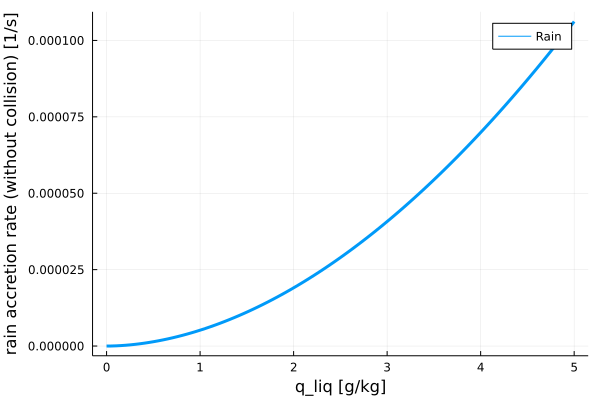

In [60]:
plot(q_rai*1e3, ac_rain, linewidth=3, xlabel="q_liq [g/kg]", ylabel="rain accretion rate (without collision) [1/s]", label="Rain")

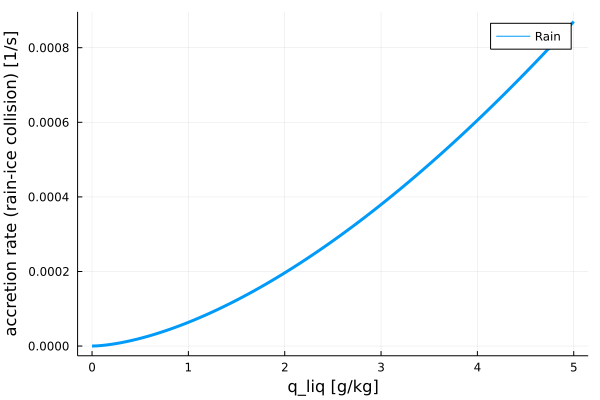

In [61]:
plot(q_rai*1e3, ac_rain_ice, linewidth=3, xlabel="q_liq [g/kg]", ylabel="accretion rate (rain-ice collision) [1/s]", label="Rain")

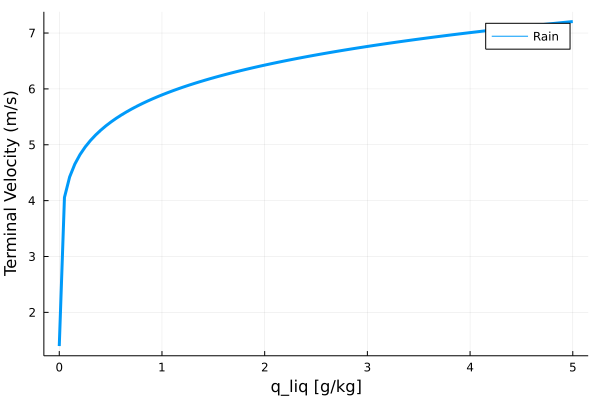

In [53]:
plot(q_rai*1e3, v_t[:], linewidth=3, xlabel="q_liq [g/kg]", ylabel="Terminal Velocity (m/s)", label="Rain")